In [1]:
''' # Key Data needs and data sources
wellness: user input logs like sleep, exercise,etc
eco impact: carbon footprint, water usage

co2 estimates, environmental data, open datasets for community-level stuff '''
''' simulate user data and store in dicionary and calculate impact'''
''' data analysis functions for daily and monthly tracking with pandas

gratitude and mood analysis from journal entries using nlp ?

visualization for trends like co2 saved and exercise

automated suggestions '''

''' deploy to front end maybe JSON export????? then can import to HTML/CSS '''

' deploy to front end maybe JSON export????? then can import to HTML/CSS '

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import json
!pip3 install textblob
from textblob import TextBlob

In [3]:
''' Simulate user data for weekly activity'''

#list of dates for 7 days
week_dates = [datetime.today() - timedelta(days=i) for i in range(7)]
week_dates = [date.strftime('%Y-%m-%d') for date in week_dates]

#simulated user input for self care and sustainability actions
data = {
    'date': week_dates,
    'exercise_minutes': np.random.randint(0, 120, size=7),
    'water_intake': np.random.randint(0, 10, size=7),
    'nourishment': np.random.randint(0, 10, size=7),
    'sleep_hours': np.random.randint(0, 12, size=7),
    'mood': np.random.randint(1, 6, size=7), #1 to 5 rating for each day of the week
    'self_care_actions': np.random.choice(["Exercise", "Water Intake", "Nourishment"], size=7),
    'eco_friendly_actions': np.random.choice(["Reusable Bottle", "Plant-based Meal", "Public Transport", "Recycling", "Biking", "Carpool", "None"], size=7),
    'journal_entry': [ "Had a great day, feeling thankful for friends and family.",
    "Felt a bit stressed today, but managed to meditate and relax.",
    "Productive day, achieved all my goals!",
    "A bit overwhelmed, but grateful for the small wins.",
    "Excited for new opportunities coming up!",
    "Feeling a bit down, but tomorrow is a new day.",
    "Energized and ready for the week ahead!"]
}


#create dataframe
df = pd.DataFrame(data)

df


# Analyze sentiment of each journal entry
def analyze_sentiment(entry):
    blob = TextBlob(entry)
    return blob.sentiment.polarity

# Apply sentiment analysis to each journal entry
df["sentiment"] = df["journal_entry"].apply(analyze_sentiment)

# Classify sentiment as Positive, Neutral, or Negative based on polarity
df["sentiment_label"] = df["sentiment"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))

df[["date", "journal_entry", "sentiment", "sentiment_label"]]

df

,date,exercise_minutes,water_intake,nourishment,sleep_hours,mood,self_care_actions,eco_friendly_actions,journal_entry,sentiment,sentiment_label
0,2024-10-27,64,5,3,7,3,Exercise,Recycling,"Had a great day, feeling thankful for friends ...",0.800000,Positive
1,2024-10-26,2,4,8,10,5,Exercise,Plant-based Meal,"Felt a bit stressed today, but managed to medi...",0.000000,Neutral
2,2024-10-25,102,2,6,5,5,Nourishment,Reusable Bottle,"Productive day, achieved all my goals!",0.000000,Neutral
3,2024-10-24,118,0,4,3,1,Exercise,Public Transport,"A bit overwhelmed, but grateful for the small ...",0.025000,Neutral
4,2024-10-23,109,9,1,7,1,Water Intake,Reusable Bottle,Excited for new opportunities coming up!,0.272727,Positive
5,2024-10-22,75,7,0,4,3,Nourishment,Carpool,"Feeling a bit down, but tomorrow is a new day.",-0.009596,Neutral
6,2024-10-21,106,1,4,6,2,Nourishment,Plant-based Meal,Energized and ready for the week ahead!,0.250000,Positive


In [4]:
# Load CO2 data from Our World in Data
url = "https://github.com/owid/co2-data/raw/master/owid-co2-data.csv"
co2_data = pd.read_csv(url)

# Filter for the most recent data
country = "United States"
recent_year = 2022 #no 2024 :(
co2_country_data = co2_data[(co2_data["country"] == country) & (co2_data["year"] == recent_year)]

# Get average CO2 emissions for comparison
avg_co2_per_capita = co2_country_data["co2_per_capita"].values[0]
print(f"Average CO2 per capita for {country} in {recent_year}: {avg_co2_per_capita:.2f} kg")

#Define sustainability impact per action
co2_savings = {
    "Reusable Bottle": 0.001,
    "Plant-based Meal": 0.002,
    "Public Transport": 0.003,
    "Recycling": 0.004,
    "Biking": 0.005,
    "Carpool": 0.006,
    "None": 0.000
}

# Sample user activity log for the month
user_activities = {
    "Reusable Bottle": 5,
    "Carpool": 3,
    "Biking": 10,
    "Public Transport": 8,
    "Plant-based Meal": 15,
    "Recycling": 2,
    "None": 0
}


#Map eco_friendly_actions to co2 reduction to show co2 savings each day in new column
df['co2_saved_kg'] = df['eco_friendly_actions'].map(co2_savings)


# Calculate total CO2 savings based on logged activities
total_co2_saved = sum(user_activities[activity] * co2_savings[activity] for activity in user_activities)

print(f"Total CO2 saved this month by user: {total_co2_saved:.2f} kg")

# Monthly
def generate_monthly_summary(user_name, total_savings, avg_emissions):
    percentage_of_avg = (total_savings / (avg_emissions * 30)) * 100
    summary = (
        f"Hello {user_name}! 🌱 This month, you've saved {total_savings:.2f} kg of CO2 "
        f"by making sustainable choices. That's about {percentage_of_avg:.1f}% of the average person's "
        f"monthly emissions in {country}. Keep up the great work for a greener planet!"
    )
    return summary


#weekly
weekly_co2_saved = df['co2_saved_kg'].sum()

print(f"Total CO2 saved this week by user: {weekly_co2_saved:.2f} kg")

# Generate and print summary
user_name = "Alex"
monthly_summary = generate_monthly_summary(user_name, total_co2_saved, avg_co2_per_capita)
print(monthly_summary)

Average CO2 per capita for United States in 2022: 14.95 kg
Total CO2 saved this month by user: 0.14 kg
Total CO2 saved this week by user: 0.02 kg
Hello Alex! 🌱 This month, you've saved 0.14 kg of CO2 by making sustainable choices. That's about 0.0% of the average person's monthly emissions in United States. Keep up the great work for a greener planet!


Total community CO2 saved this month: 30.64 kg
Community CO2 Goal Progress: 6.1%
🌍 Community Impact Summary 🌍
Together, our community has saved 30.64 kg of CO2 this month! That's 6.1% of our collective goal of 500.0 kg. Thank you for making sustainable choices and helping create a greener future!


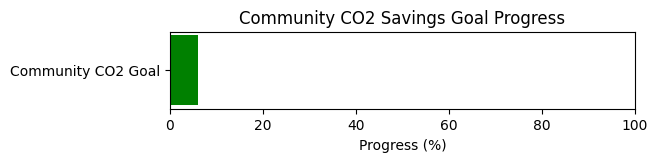

In [5]:
''' Social Good Meter with Community Goals '''

# Community CO2 savings goal for the month
community_co2_goal = 500.0  # in kg

# Here we simulate data for multiple users' monthly CO2 savings
user_data = {
    "User": ["Alex", "Jordan", "Taylor", "Morgan"],
    "CO2_Saved_kg": [total_co2_saved, 8.5, 12.7, 9.3]
}

community_df = pd.DataFrame(user_data)

# Clculate taotal CO2 savings for the community
total_community_co2_saved = community_df["CO2_Saved_kg"].sum()
print(f"Total community CO2 saved this month: {total_community_co2_saved:.2f} kg")

# Calculate progress as a percentage of the community goal
community_progress = (total_community_co2_saved / community_co2_goal) * 100

# Cap progress at 100% if it exceeds the goal
community_progress = min(community_progress, 100)

# Display community progress
print(f"Community CO2 Goal Progress: {community_progress:.1f}%")

def generate_community_summary(total_community_co2_saved, community_goal):
    progress_message = (
        f"🌍 Community Impact Summary 🌍\n"
        f"Together, our community has saved {total_community_co2_saved:.2f} kg of CO2 this month! "
        f"That's {community_progress:.1f}% of our collective goal of {community_goal} kg. "
        "Thank you for making sustainable choices and helping create a greener future!"
    )
    return progress_message

# Generate and print community summary
community_summary = generate_community_summary(total_community_co2_saved, community_co2_goal)
print(community_summary)
import matplotlib.pyplot as plt

# Plot community progress as a bar chart
plt.figure(figsize=(6, 1))
plt.barh(["Community CO2 Goal"], [community_progress], color="green")
plt.xlim(0, 100)
plt.xlabel("Progress (%)")
plt.title("Community CO2 Savings Goal Progress")
plt.show()

In [6]:
''' Social Good Meter with Mental Wellness '''

# Calculate average mood rating
average_mood = df["mood"].mean()
print(f"Average mood rating for the week: {average_mood:.2f}")

# Count positive, neutral, and negative sentiments
sentiment_counts = df["sentiment_label"].value_counts()
print("Sentiment breakdown for the week:")
print(sentiment_counts)

Average mood rating for the week: 2.86
Sentiment breakdown for the week:
sentiment_label
Neutral     4
Positive    3
Name: count, dtype: int64


Sustainability Goal Progress: 38.0%
Wellness Goal Progress: 50.0%
🌍 Sustainability Summary 🌍
This week, you've saved 0.019 kg of CO2, reaching 38.0% of our community's weekly goal of 0.05 kg.

🧘 Mental Wellness Summary 🧘
You achieved 5 positive actions, contributing to 50.0% of our wellness goal of 10 positive actions.

Thank you for prioritizing both sustainability and well-being! Keep up the great work!


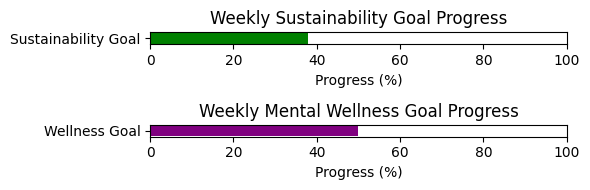

In [7]:
# Set weekly community goals
weekly_sustainability_goal = 0.05  # kg CO2
weekly_wellness_goal = 10  # Number of positive actions or sentiments

# Calculate progress towards sustainability goal
sustainability_progress = (weekly_co2_saved / weekly_sustainability_goal) * 100
sustainability_progress = min(sustainability_progress, 100)

# Calculate progress towards wellness goal
positive_actions = df[df["mood"] >= 4].shape[0]
positive_sentiments = sentiment_counts.get("Positive", 0)
total_positive_contributions = positive_actions + positive_sentiments

wellness_progress = (total_positive_contributions / weekly_wellness_goal) * 100
wellness_progress = min(wellness_progress, 100)

# Display progress
print(f"Sustainability Goal Progress: {sustainability_progress:.1f}%")
print(f"Wellness Goal Progress: {wellness_progress:.1f}%")

def generate_weekly_summary(total_co2, sustainability_goal, wellness_goal, pos_contrib, sus_progress, wel_progress):
    summary = (
        f"🌍 Sustainability Summary 🌍\n"
        f"This week, you've saved {total_co2:.3f} kg of CO2, reaching {sus_progress:.1f}% of our community's weekly goal "
        f"of {sustainability_goal} kg.\n\n"
        f"🧘 Mental Wellness Summary 🧘\n"
        f"You achieved {pos_contrib} positive actions, contributing to {wel_progress:.1f}% of our wellness goal of "
        f"{wellness_goal} positive actions.\n\n"
        "Thank you for prioritizing both sustainability and well-being! Keep up the great work!"
    )
    return summary

# Generate and print weekly summary
weekly_summary = generate_weekly_summary(
    weekly_co2_saved, weekly_sustainability_goal, weekly_wellness_goal,
    total_positive_contributions, sustainability_progress, wellness_progress
)
print(weekly_summary)

import matplotlib.pyplot as plt

# Plot sustainability and wellness goal progress
fig, ax = plt.subplots(2, 1, figsize=(6, 2))

# Sustainability progress
ax[0].barh(["Sustainability Goal"], [sustainability_progress], color="green")
ax[0].set_xlim(0, 100)
ax[0].set_xlabel("Progress (%)")
ax[0].set_title("Weekly Sustainability Goal Progress")

# Wellness progress
ax[1].barh(["Wellness Goal"], [wellness_progress], color="purple")
ax[1].set_xlim(0, 100)
ax[1].set_xlabel("Progress (%)")
ax[1].set_title("Weekly Mental Wellness Goal Progress")

plt.tight_layout()
plt.show()

In [8]:
''' Dynamic Journal with Sentiment Analysis '''

# Simulated journal entries for each day
df["journal_entry"] = [
    "Had a great day, feeling thankful for friends and family.",
    "Felt a bit stressed today, but managed to meditate and relax.",
    "Productive day, achieved all my goals!",
    "A bit overwhelmed, but grateful for the small wins.",
    "Excited for new opportunities coming up!",
    "Feeling a bit down, but tomorrow is a new day.",
    "Energized and ready for the week ahead!"
]


df

# Analyze sentiment of each journal entry
def analyze_sentiment(entry):
    blob = TextBlob(entry)
    return blob.sentiment.polarity

# Apply sentiment analysis to each journal entry
df["sentiment"] = df["journal_entry"].apply(analyze_sentiment)

# Classify sentiment as Positive, Neutral, or Negative based on polarity
df["sentiment_label"] = df["sentiment"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))

df[["date", "journal_entry", "sentiment", "sentiment_label"]]

,date,journal_entry,sentiment,sentiment_label
0,2024-10-27,"Had a great day, feeling thankful for friends ...",0.800000,Positive
1,2024-10-26,"Felt a bit stressed today, but managed to medi...",0.000000,Neutral
2,2024-10-25,"Productive day, achieved all my goals!",0.000000,Neutral
3,2024-10-24,"A bit overwhelmed, but grateful for the small ...",0.025000,Neutral
4,2024-10-23,Excited for new opportunities coming up!,0.272727,Positive
5,2024-10-22,"Feeling a bit down, but tomorrow is a new day.",-0.009596,Neutral
6,2024-10-21,Energized and ready for the week ahead!,0.250000,Positive


In [9]:
#Calculate a daily summary of users actions
def daily_summary(df):
    summary = df[['date', 'exercise_minutes', 'water_intake', 'nourishment', 'co2_saved_kg']].copy()
    return summary

#weekly summary
def weekly_summary(df):
    weekly_summary = {
        'total_exercise_minutes': df['exercise_minutes'].sum(),
        'total_water_intake': df['water_intake'].sum(),
        'total_nourishment': df['nourishment'].sum(),
        'total_co2_saved': df['co2_saved_kg'].sum()
    }
    return weekly_summary

daily_data = daily_summary(df)
weekly_data = weekly_summary(df)

#Monthly Summary
total_exercise_minutes = df["exercise_minutes"].sum()
total_co2_saved = df["co2_saved_kg"].sum()
total_water_intake = df["water_intake"].sum()
total_nourishment = df["nourishment"].sum()

monthly_summary = {
    "total_exercise_minutes": total_exercise_minutes,
    "total_co2_saved_kg": total_co2_saved,
    "total_water_intake": total_water_intake,
    "total_nourishment": total_nourishment
}

print("Daily Summary")
print(daily_data)
print("\nWeekly Summary")
print(weekly_data)
print("\nMonthly Summary")
print(monthly_summary)

Daily Summary
         date  exercise_minutes  water_intake  nourishment  co2_saved_kg
0  2024-10-27                64             5            3         0.004
1  2024-10-26                 2             4            8         0.002
2  2024-10-25               102             2            6         0.001
3  2024-10-24               118             0            4         0.003
4  2024-10-23               109             9            1         0.001
5  2024-10-22                75             7            0         0.006
6  2024-10-21               106             1            4         0.002

Weekly Summary
{'total_exercise_minutes': 576, 'total_water_intake': 28, 'total_nourishment': 26, 'total_co2_saved': 0.019000000000000003}

Monthly Summary
{'total_exercise_minutes': 576, 'total_co2_saved_kg': 0.019000000000000003, 'total_water_intake': 28, 'total_nourishment': 26}


In [10]:
''' Mood Tracking '''
#Motivational quotes based on mood rating
def generate_prompt(mood):
  if mood >=4:
    return "Keep up the great work! Reflect on what made today great."
  elif mood == 3:
    return "You are doing just fine. Wanna try focusing on the good of today?"
  else:
    return "We all have off days, but it would be good to think of at least one thing you are thankful for in your life to keep your spirits high!"

#prompts for each day
df["prompt"] = df["mood"].apply(generate_prompt)
df[["date", "mood", "prompt", "journal_entry"]]

,date,mood,prompt,journal_entry
0,2024-10-27,3,You are doing just fine. Wanna try focusing on...,"Had a great day, feeling thankful for friends ..."
1,2024-10-26,5,Keep up the great work! Reflect on what made t...,"Felt a bit stressed today, but managed to medi..."
2,2024-10-25,5,Keep up the great work! Reflect on what made t...,"Productive day, achieved all my goals!"
3,2024-10-24,1,"We all have off days, but it would be good to ...","A bit overwhelmed, but grateful for the small ..."
4,2024-10-23,1,"We all have off days, but it would be good to ...",Excited for new opportunities coming up!
5,2024-10-22,3,You are doing just fine. Wanna try focusing on...,"Feeling a bit down, but tomorrow is a new day."
6,2024-10-21,2,"We all have off days, but it would be good to ...",Energized and ready for the week ahead!


In [11]:
''' Mindful Reminders '''
def generate_reminder(activity):
    if activity in ["Biking", "Public Transport"]:
        return "Awesome job on reducing emissions! Keep up the eco-friendly travel."
    elif activity == "Plant-based Meal":
        return "Thanks for choosing plant-based! Your choice makes a big difference."
    elif activity == "None":
        return "Consider adding an eco-friendly action today!"
    else:
        return "You're making a positive impact every day!"

# Apply reminders based on sustainable choice
df["reminder"] = df["eco_friendly_actions"].apply(generate_reminder)
df[["date", "eco_friendly_actions", "reminder"]]

,date,eco_friendly_actions,reminder
0,2024-10-27,Recycling,You're making a positive impact every day!
1,2024-10-26,Plant-based Meal,Thanks for choosing plant-based! Your choice m...
2,2024-10-25,Reusable Bottle,You're making a positive impact every day!
3,2024-10-24,Public Transport,Awesome job on reducing emissions! Keep up the...
4,2024-10-23,Reusable Bottle,You're making a positive impact every day!
5,2024-10-22,Carpool,You're making a positive impact every day!
6,2024-10-21,Plant-based Meal,Thanks for choosing plant-based! Your choice m...


In [12]:
''' Social Good Tracking '''
# Community Goal in kg of CO2
community_goal = 1000

# Calculate user's contribution as a percentage of the community goal
user_contribution = (total_co2_saved / community_goal) * 100
user_contribution_text = f"Your efforts contribute {user_contribution:.2f}% to the community goal of {community_goal} kg CO2 reduction!"

print(user_contribution_text)

Your efforts contribute 0.00% to the community goal of 1000 kg CO2 reduction!


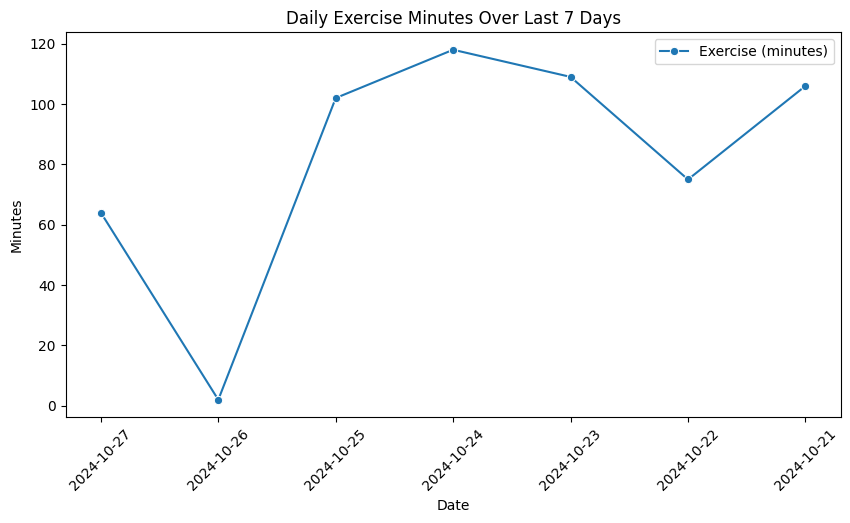

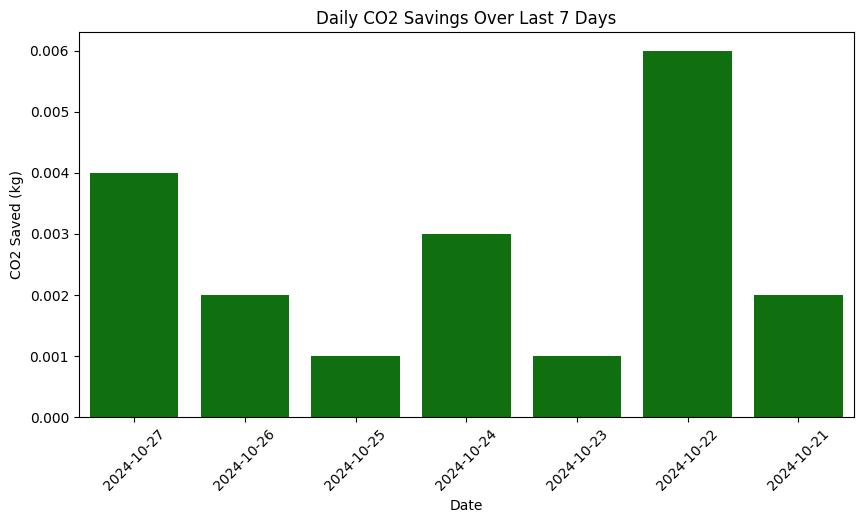

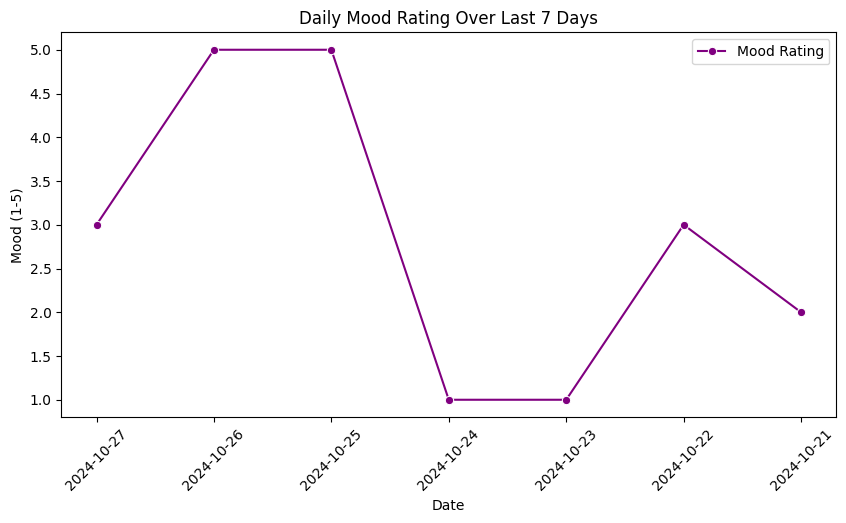

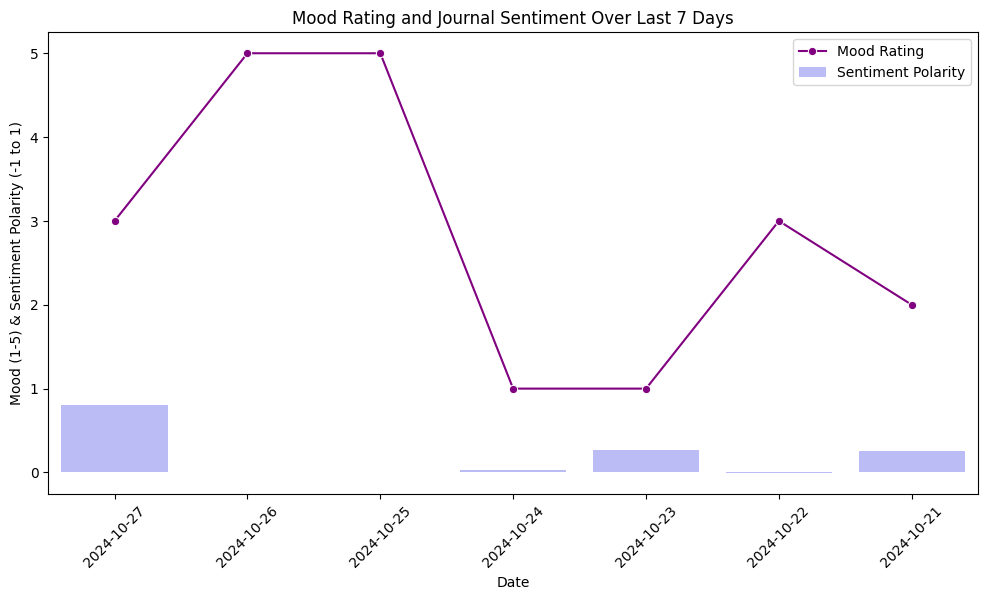

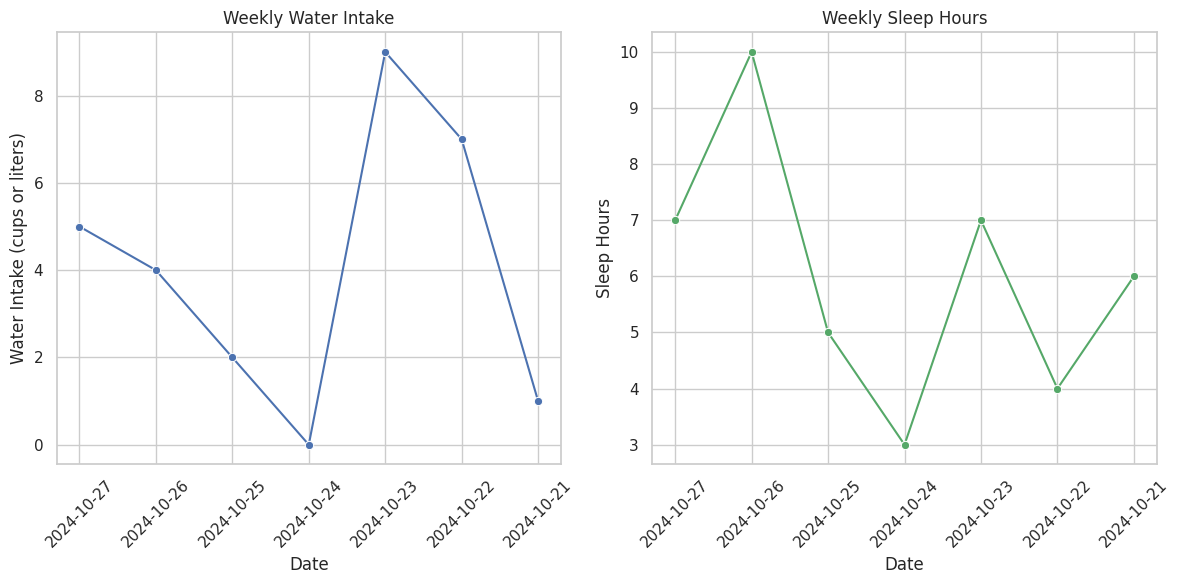

In [13]:

''' Data Visualization '''

# Exercise over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["date"], y=df["exercise_minutes"], marker="o", label="Exercise (minutes)")
plt.title("Daily Exercise Minutes Over Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Minutes")
plt.xticks(rotation=45)
plt.legend()
#plt.show()

# CO2 Savings over time
plt.figure(figsize=(10, 5))
sns.barplot(x=df["date"], y=df["co2_saved_kg"], color="green")
plt.title("Daily CO2 Savings Over Last 7 Days")
plt.xlabel("Date")
plt.ylabel("CO2 Saved (kg)")
plt.xticks(rotation=45)
#plt.show()
# Plot mood over time
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["date"], y=df["mood"], marker="o", color="purple", label="Mood Rating")
plt.title("Daily Mood Rating Over Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Mood (1-5)")
plt.xticks(rotation=45)
plt.legend()
#plt.show()
# Mood and Sentiment Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["date"], y=df["mood"], marker="o", color="purple", label="Mood Rating")
sns.barplot(x=df["date"], y=df["sentiment"], alpha=0.3, color="blue", label="Sentiment Polarity")

plt.title("Mood Rating and Journal Sentiment Over Last 7 Days")
plt.xlabel("Date")
plt.ylabel("Mood (1-5) & Sentiment Polarity (-1 to 1)")
plt.xticks(rotation=45)
plt.legend()
#plt.show()
# Set up the plot style and size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot for water intake
plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='water_intake', data=df, marker='o', color='b')
plt.title("Weekly Water Intake")
plt.xlabel("Date")
plt.ylabel("Water Intake (cups or liters)")
plt.xticks(rotation=45)

# Plot for sleep hours
plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='sleep_hours', data=df, marker='o', color='g')
plt.title("Weekly Sleep Hours")
plt.xlabel("Date")
plt.ylabel("Sleep Hours")
plt.xticks(rotation=45)

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [62]:
''' Taking real user input for analysis and importing into JSON file '''
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Define the number of days for user input
num_days = 7
week_dates = [(datetime.today() - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(num_days)]

# Initialize a dictionary to hold user input
user_data = {
    'date': week_dates,
    'exercise_minutes': [],
    'water_intake': [],
    'nourishment': [],
    'sleep_hours': [],
    'mood': [],
    'self_care_actions': [],
    'eco_friendly_actions': [],
    'journal_entry': []
}

# Collect user data
for date in week_dates:
    print(f"Enter data for {date}:")
    user_data['exercise_minutes'].append(int(input("How many minutes of exercise have you gotten today?: ")))
    user_data['water_intake'].append(float(input("How much water have you drank today? (in liters): ")))
    user_data['nourishment'].append(int(input("Have you nourished your body with a good 3 meals (1-10 scale): ")))
    user_data['sleep_hours'].append(float(input("How many hours of sleep?: ")))
    user_data['mood'].append(int(input("Mood (1-5 scale): ")))
    user_data['self_care_actions'].append(input("Self-care action taken: "))
    user_data['eco_friendly_actions'].append(input("Eco-friendly action taken: "))
    user_data['journal_entry'].append(input("Journal entry for the day: "))


df = pd.DataFrame(user_data)

# Define sustainability impact for CO2 savings mapping
co2_savings = {
    "Reusable Bottle": 0.001,
    "Plant-based Meal": 0.002,
    "Public Transport": 0.003,
    "Recycling": 0.004,
    "Biking": 0.005,
    "Carpool": 0.006,
    "None": 0.000
}

# Map eco_friendly_actions to co2 reduction
df['co2_saved_kg'] = df['eco_friendly_actions'].map(co2_savings).fillna(0)

# Export the DataFrame to JSON
json_file_path = 'user_data.json'
df.to_json(json_file_path, orient='records', lines=True)

print(f"User data saved to {json_file_path}")


df

Enter data for 2024-10-27:
Minutes of exercise: 30
Water intake in liters: 2
Nourishment (1-10 scale): 9
Hours of sleep: 8
Mood (1-5 scale): 5
Self-care action taken: Yoga
Eco-friendly action taken: Recycling
Journal entry for the day: soooooo sleepy
Enter data for 2024-10-26:
Minutes of exercise: 0
Water intake in liters: 1
Nourishment (1-10 scale): 7
Hours of sleep: 0
Mood (1-5 scale): 2
Self-care action taken: None
Eco-friendly action taken: Recycling
Journal entry for the day: Hingry
Enter data for 2024-10-25:
Minutes of exercise: 22
Water intake in liters: 1
Nourishment (1-10 scale): 2
Hours of sleep: 3
Mood (1-5 scale): 3
Self-care action taken: None
Eco-friendly action taken: None
Journal entry for the day: Just drank some red bull
Enter data for 2024-10-24:
Minutes of exercise: 2
Water intake in liters: .5
Nourishment (1-10 scale): 10
Hours of sleep: 5
Mood (1-5 scale): 5
Self-care action taken: Meditation
Eco-friendly action taken: None
Journal entry for the day: Mannnn
Enter 

,date,exercise_minutes,water_intake,nourishment,sleep_hours,mood,self_care_actions,eco_friendly_actions,journal_entry,co2_saved_kg
0,2024-10-27,30,2.0,9,8.0,5,Yoga,Recycling,soooooo sleepy,0.004
1,2024-10-26,0,1.0,7,0.0,2,None,Recycling,Hingry,0.004
2,2024-10-25,22,1.0,2,3.0,3,None,None,Just drank some red bull,0.000
3,2024-10-24,2,0.5,10,5.0,5,Meditation,None,Mannnn,0.000
4,2024-10-23,25,2.0,8,9.0,5,Bath,Public Transportation,bruhhh,0.000
5,2024-10-22,0,2.0,3,4.0,5,None,None,omggggg,0.000
6,2024-10-21,30,4.0,10,6.0,3,None,None,meh,0.000


In [ ]:
'''from google.colab import files
files.download(json_file_path)'''

In [63]:
''' Trying to use Google Sheets as backend data store '''
from google.colab import auth, files
import gspread
from gspread_dataframe import set_with_dataframe
from oauth2client.service_account import ServiceAccountCredentials


uploaded = files.upload()


# Authenticate with Google Drive
auth.authenticate_user()

# Set up Google Sheets API scope and credentials
scope = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/spreadsheets',
         'https://www.googleapis.com/auth/drive.file', 'https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name('technica2024-2747170ae828.json', scope)
client = gspread.authorize(creds)

#Open Google Sheet by ID
sheet_id = '1p8RvwODjmaw3HQ5HgBoJ87VI8v2koUDEV34vEgPeZmg'
sheet = client.open_by_key(sheet_id).sheet1

Saving technica2024-2747170ae828.json to technica2024-2747170ae828 (5).json


In [70]:

# Add columns for CO2 savings, daily and weekly summaries, sentiment analysis, and other analysis
def calculate_summaries(df):

    # Calculate CO2 savings per day based on `eco_friendly_actions`
    df['co2_saved_kg'] = df['eco_friendly_actions'].map(co2_savings)
    # Daily summary as a formatted string
    df["daily_summary"] = df.apply(lambda row: f"CO2 saved: {row['co2_saved_kg']:.2f} kg, Mood: {row['mood']:.1f}, Water Intake: {row['water_intake']:.1f} glasses", axis=1)

    # Weekly summaries
    weekly_water_intake = df["water_intake"].rolling(window=7).sum()
    weekly_sleep_hours = df["sleep_hours"].rolling(window=7).sum()

    df["weekly_water_intake"] = weekly_water_intake
    df["weekly_sleep_hours"] = weekly_sleep_hours

    # Calculate average mood, water intake, and sleep hours
    df["average_mood"] = df["mood"].rolling(window=7).mean().fillna(0)
    df["average_sleep_hours"] = df["sleep_hours"].rolling(window=7).mean().fillna(0)
    df["average_water_intake"] = df["water_intake"].rolling(window=7).mean().fillna(0)

    # Sentiment analysis already applied earlier
    df["sentiment_score"] = df["journal_entry"].apply(lambda entry: TextBlob(entry).sentiment.polarity)
    df["sentiment_label"] = df["sentiment_score"].apply(lambda x: "Positive" if x > 0.1 else ("Negative" if x < -0.1 else "Neutral"))

    return df

# Calculate summaries and update DataFrame
df = calculate_summaries(df)

# Fill NaN values with 0 or appropriate values to ensure clean export
df.fillna({
    'co2_saved_kg': 0,
    'average_mood': 0,
    'average_sleep_hours': 0,
    'average_water_intake': 0,
    'weekly_water_intake': 0,
    'weekly_sleep_hours': 0
}, inplace=True)


# Export final DataFrame with all analyses to Google Sheets
sheet.clear()  # Clear existing data, if necessary
set_with_dataframe(sheet, df)  # Export DataFrame to Google Sheets

In [68]:
df = pd.DataFrame(user_data)

# Convert the DataFrame to a list of lists
rows = [df.columns.values.tolist()] + df.values.tolist()  # Include headers

# Clear the sheet before updating
# sheet.clear()

# Update the sheet with new data
sheet.update(rows)

{'spreadsheetId': '1p8RvwODjmaw3HQ5HgBoJ87VI8v2koUDEV34vEgPeZmg',
 'updatedRange': 'Sheet1!A1:I8',
 'updatedRows': 8,
 'updatedColumns': 9,
 'updatedCells': 72}